In [7]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

In [8]:
#problema pra exibir o grafico é em algo no data3, no data All vai de boa !!
with open('data/data3.txt', 'rb') as file:
    auxFile = file.read()


data3 = np.frombuffer(auxFile)
data3.resize((int(len(data3)/3)), 3)

X = data3[...,0:2] #[[x01,x02], ...]
y = data3[...,2] #[[yd0], [yd1], ...]

# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

#instanciando o neuronio, inserindo apenas a taxa de aprendizado
# e os intervalos superior e inferior dos pesos
configs= [[0.4,-100,100], [0.4,-1,1], [0.4,-0.5,0.5], 
         [0.1,-100,100], [0.1,-1,1], [0.1,-0.5,0.5],
        [0.01,-100,100], [0.01,-1,1], [0.01,-0.5,0.5]]


fitWeight = []
epoch = []
for i in range(9):
    print("Configuração: ", configs[i])
    n = Neuron(configs[i][0], configs[i][1], configs[i][2])
    print("Vetor de pesos inicial: ",n.weightArray)
    n.iteratedFit(X, y, 100)
    fitWeight.append(n.fitCountWeight)
    epoch.append(n.epoch)
    print("Alterações no vetor de Pesos: ", n.fitCountWeight)
    print("Numero de Epocas: ", n.epoch)
    print("Vetor de Pesos no final: ", np.around(n.weightArray,4))
    print('\n')
    
print(fitWeight, epoch)

x = [i for i in range(-len(data3),len(data3))]
line = [(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x]# calcula a reta y = mx + b

Configuração:  [0.4, -100, 100]
Vetor de pesos inicial:  [-23.70640501 -23.49643424  -9.12627364]
Alterações no vetor de Pesos:  173
Numero de Epocas:  8
Vetor de Pesos no final:  [11.6379 -3.5049 -3.1263]


Configuração:  [0.4, -1, 1]
Vetor de pesos inicial:  [-0.81377455  0.97044024  0.15770883]
Alterações no vetor de Pesos:  12
Numero de Epocas:  5
Vetor de Pesos no final:  [ 0.991   0.0634 -0.6423]


Configuração:  [0.4, -0.5, 0.5]
Vetor de pesos inicial:  [ 0.03081846 -0.37292075 -0.3466522 ]
Alterações no vetor de Pesos:  9
Numero de Epocas:  4
Vetor de Pesos no final:  [ 1.1576  0.0772 -0.7467]


Configuração:  [0.1, -100, 100]
Vetor de pesos inicial:  [-83.38160859 -80.3426305   19.59954967]
Alterações no vetor de Pesos:  2269
Numero de Epocas:  31
Vetor de Pesos no final:  [15.4803 -5.1763 -4.3005]


Configuração:  [0.1, -1, 1]
Vetor de pesos inicial:  [ 0.99516983  0.22757771 -0.47170566]
Alterações no vetor de Pesos:  1
Numero de Epocas:  2
Vetor de Pesos no final:  [ 0.9732

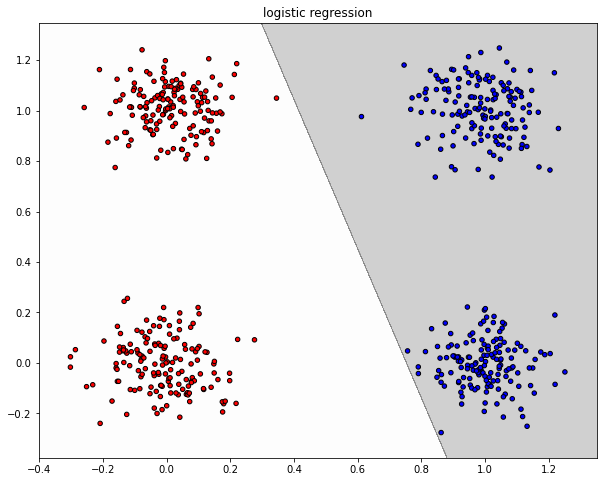

In [54]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['logistic regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)


plt.show()

# f.savefig('gaph2.png')
# plt.close(f)

#exportando a figura para por no markdown